In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
state_dict = torch.load('./afm_results/w1_e0_l0_r128_epoch20/model.pt')

In [7]:
state_dict.keys()

dict_keys(['wk_adapter_1.fc1.weight', 'wk_adapter_1.fc2.weight', 'wk_adapter_2.fc1.weight', 'wk_adapter_2.fc2.weight', 'wk_adapter_3.fc1.weight', 'wk_adapter_3.fc2.weight', 'wk_adapter_4.fc1.weight', 'wk_adapter_4.fc2.weight', 'wk_adapter_5.fc1.weight', 'wk_adapter_5.fc2.weight', 'wk_adapter_6.fc1.weight', 'wk_adapter_6.fc2.weight', 'wk_adapter_7.fc1.weight', 'wk_adapter_7.fc2.weight'])

# plot norm of the weights

In [10]:
norm_fc1_per_adapter = []
norm_fc2_per_adapter = []
adapter_ids = []
for adapter_id in range(1, 8):
    fc1 = state_dict[f'wk_adapter_{adapter_id}.fc1.weight']
    fc2 = state_dict[f'wk_adapter_{adapter_id}.fc2.weight']
    norm_fc1 = torch.norm(fc1)
    norm_fc2 = torch.norm(fc2)
    norm_fc1_per_adapter.append(norm_fc1.item())
    norm_fc2_per_adapter.append(norm_fc2.item())
    adapter_ids.append(adapter_id)

Text(0, 0.5, 'Norm of FC2')

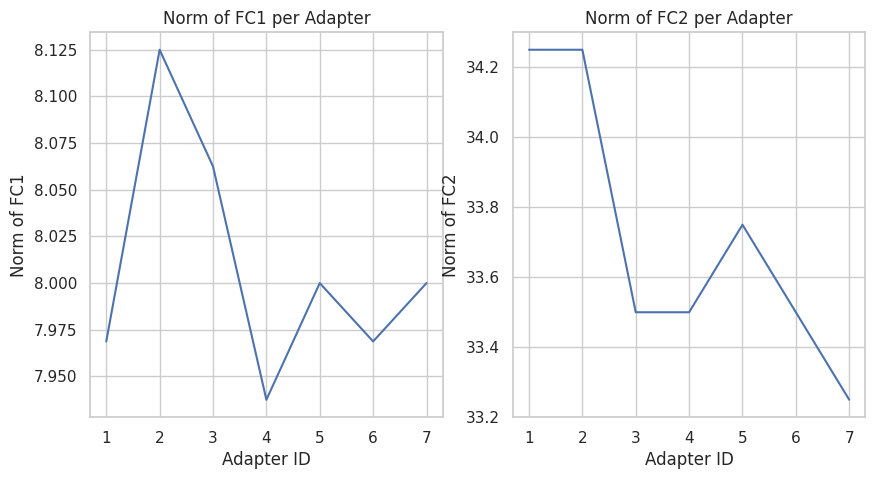

In [11]:
df = pd.DataFrame({'adapter_id': adapter_ids, 'norm_fc1': norm_fc1_per_adapter, 'norm_fc2': norm_fc2_per_adapter})

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax0 = sns.lineplot(x="adapter_id", y="norm_fc1", data=df, ax=ax[0])
ax0.set_title('Norm of FC1 per Adapter')
ax0.set_xlabel('Adapter ID')
ax0.set_ylabel('Norm of FC1')

ax1 = sns.lineplot(x="adapter_id", y="norm_fc2", data=df, ax=ax[1])
ax1.set_title('Norm of FC2 per Adapter')
ax1.set_xlabel('Adapter ID')
ax1.set_ylabel('Norm of FC2')
